## Correlation: &thinsp; DOC and relative humidity (hur)

In [134]:
import xarray as xr
import numpy as np
import skimage.measure as skm
import pandas as pd
import scipy
from scipy import stats

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [135]:
from myFuncs import *

In [136]:
plt.rcParams['figure.figsize'] = [10, 7.5]

### one dataset

In [137]:
variable = 'hur'

data_options= [
    'hur'
    ]

org_options= [
    'rome'
    # 'ni'
    ]

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    # 'bcc-csm1-1',   # 4 no wao rcp
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data, no hus rcp data
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13 no wap data
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data, no hus data
    ]

observations = [
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiment= experiments[0], resolution=resolutions[0])
ds

variable:hur, dataset:GFDL-CM3, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (plev: 23, time: 360, lat: 22, lon: 128)
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    hur      (time, plev, lat, lon) float32 ...

In [138]:
data = ds['hur'].sel(plev=slice(850e2,0))
data = (data * data.plev).sum(dim='plev') / data.plev.sum(dim='plev')
data

<xarray.DataArray (time: 360, lat: 22, lon: 128)>
array([[[25.41472511, 23.54096319, 22.62738778, ..., 32.32239272,
         29.52884287, 27.57420443],
        [21.2616408 , 19.70383758, 18.70146119, ..., 27.99990484,
         25.42668223, 23.24702176],
        [19.80870734, 18.34665812, 17.56103097, ..., 26.65732326,
         24.14811264, 21.79264231],
        ...,
        [21.34090828, 23.91119052, 27.13437271, ..., 21.38480207,
         20.68224568, 20.13606269],
        [23.01470221, 25.54645865, 29.35868394, ..., 25.34771817,
         24.53870649, 23.20309785],
        [30.33934512, 30.70745094, 32.37386044, ..., 32.84785018,
         32.65393093, 31.45787341]],

       [[28.18621515, 25.05397797, 21.90136542, ..., 37.0499869 ,
         34.34182513, 31.27181646],
        [24.61207581, 20.97175666, 17.7288833 , ..., 32.94818647,
         30.54802163, 27.85187928],
        [22.36808687, 18.88224945, 17.05748208, ..., 30.48150024,
         28.1411842 , 25.41850212],
...
        [31.19656977, 31.48400364, 32.63384931, ..., 30.3245497 ,
         30.56953619, 30.87770519],
        [29.99237174, 30.30524034, 31.20432783, ..., 32.59277467,
         31.4091087 , 30.43594076],
        [33.90625263, 33.25174119, 32.67932843, ..., 40.34451049,
         38.18036277, 35.61072574]],

       [[28.46391266, 27.00683622, 24.84209635, ..., 32.25309347,
         30.71081095, 29.43876759],
        [23.69278889, 21.96883646, 19.69292754, ..., 27.05322203,
         25.6021246 , 24.6322506 ],
        [21.2089194 , 19.82145763, 17.89149239, ..., 24.77161811,
         23.25697277, 22.21385593],
        ...,
        [20.04906955, 20.17414717, 21.48733386, ..., 21.22794981,
         20.84983462, 20.35397745],
        [22.58708513, 23.150679  , 24.83711167, ..., 23.96355315,
         23.61669871, 23.00145582],
        [29.78385596, 31.1006733 , 32.31861617, ..., 30.9698522 ,
         31.00232368, 29.90198511]]])
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

In [139]:
org = get_metric(org_options[0], datasets[0], experiments[0], resolution=resolutions[0])[org_options[0]].resample(time='M').mean(dim='time', keep_attrs=True)
org = org.assign_coords(time=data.time)
org

<xarray.DataArray 'rome' (time: 360)>
array([1001817.94450337,  910211.22873321,  594803.71567496,
        739315.94032675,  560954.42603724,  650517.3165139 ,
        643903.60330577,  733679.6877008 ,  692452.44069591,
        778226.3321681 ,  859966.09207445,  725310.60030998,
        965395.5456922 ,  965030.77354212, 1040247.24631379,
        801261.36252464,  637989.09324067,  610731.44805093,
        631766.81883319,  619015.0355629 ,  657893.34757701,
        614086.71037621,  669693.06468753,  931321.54793145,
        702077.83784309,  816128.57001538,  764156.41920556,
        748324.30081951,  671770.94660258,  606459.06952413,
        686625.27419798,  707653.21522463,  681003.8807852 ,
        773478.99251589,  769381.90730659,  796153.9793466 ,
        910281.84221095,  967664.02443186,  764076.13884328,
        568854.58589453,  591257.70237476,  619523.09525419,
        557742.63008996,  604280.23788034,  656261.58038085,
        685223.88107652,  752733.29179882,  822210.01334278,
        883524.92353652, 1134404.56845846,  690477.62870352,
        653933.6430645 ,  658599.86771622,  593970.6009816 ,
        752969.70916653,  702656.35202398,  903023.10948288,
        608824.70761481,  752879.42525001,  768959.64638751,
...
        930803.31943748,  857805.63157006,  597239.14749643,
        692472.99305629,  574660.36418254,  661020.34525819,
        637698.15714259,  581128.38338425,  693320.10963527,
        744641.82677214,  754783.49555948,  865796.26011561,
        741668.56675735,  968250.24197477,  781219.79637291,
        628837.48852397,  694600.6770116 ,  648300.45013438,
        649051.12097357,  940594.48999263,  830925.7307101 ,
        770667.16861178,  773431.33850325,  811713.09568173,
       1193338.58799075, 1260928.35370629, 1125997.45345627,
        807336.68545923,  685104.7920263 ,  663878.07294265,
        649853.83729136,  572884.29047217,  726852.48804769,
        790448.29820266,  698585.84552178,  775525.6802874 ,
        946708.92572996, 1019624.88571817,  860637.38108762,
        766230.84421031,  626298.41107912,  681694.78634987,
        691501.25844211,  678669.10998748,  657086.61207379,
        747141.60286626,  847456.04306722, 1024628.46775067,
        875088.54550733, 1256806.8190119 ,  905973.35917065,
        754916.24029765,  639026.91657034,  615085.78462048,
        682214.06202593,  675399.64199771,  734578.54082314,
        646098.2486249 ,  720049.54273134,  782101.02901981])
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
Attributes:
    units:    km^2

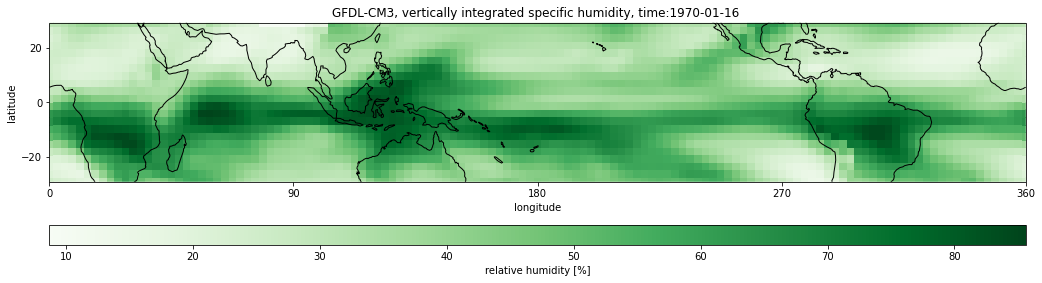

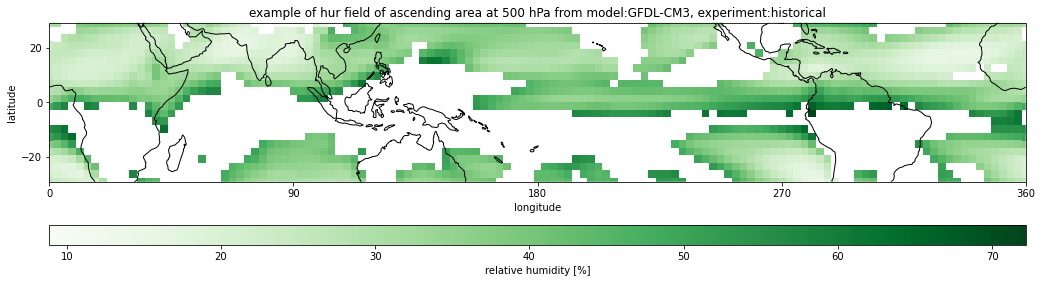

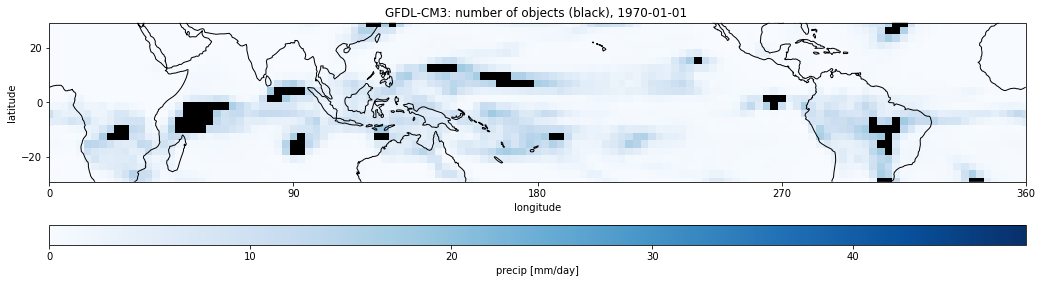

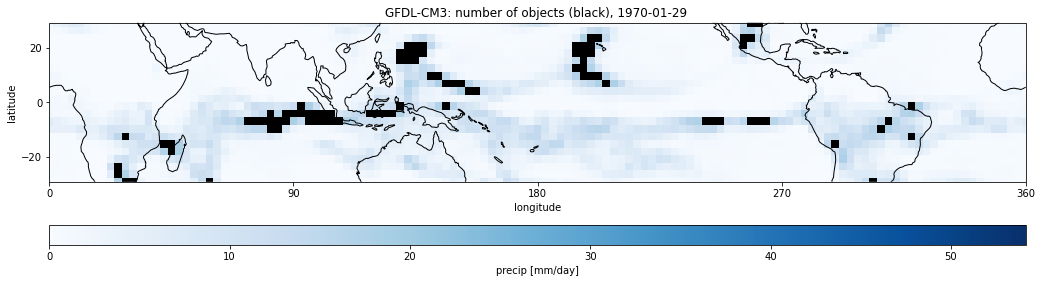

In [140]:
fig= plt.figure(figsize=(17.5,8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

scene = data.isel(time=0)

lat = scene.lat
lon = scene.lon
lonm,latm = np.meshgrid(lon,lat)

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)
ax.set_title(datasets[0] + ', vertically integrated specific humidity, time:' + str(scene.coords['time'].values)[:11] )
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'relative humidity' + ' [{}]'.format('%'))


hus_d = True
if hus_d:
    wap500 = get_dsvariable('wap', datasets[0], experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
    wap500 = resample_timeMean(wap500, 'monthly')
    wap500 = wap500.assign_coords(time=data.time)
    data = data.where(wap500>0, np.nan)
    scene = data.isel(time=0)

    title = 'example of {} field of ascending area at 500 hPa from model:{}, experiment:{}'.format(variable, datasets[0], experiments[0])
    fig= plt.figure(figsize=(17.5,8))
    ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)
    ax.set_title(title)
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')

    ax.set_yticks([-20, 0, 20])
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])

    plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'relative humidity' + ' [{}]'.format('%'))



scene = get_dsvariable('precip', datasets[0],experiments[0],home, resolutions[0])['precip'].isel(time=0)
conv_threshold = get_metric('prPercentiles', datasets[0], experiments[0])['pr97'].mean(dim=('time'))

lat = scene.lat
lon = scene.lon
lonm,latm = np.meshgrid(lon,lat)

obj = skm.label(scene.where(scene>=conv_threshold,0)>0, background=np.nan,connectivity=2)
obj = (obj>0)*1
labelMatrix = xr.DataArray(
    data=obj,
    dims=['lat', 'lon'],
    coords={'lat': scene.lat.data, 'lon': scene.lon.data}
    )
obj = labelMatrix.where(labelMatrix>0)


fig= plt.figure(figsize=(17.5,8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues') #, vmin=10, vmax=50)
ax.pcolormesh(lonm,latm, obj,transform=cartopy.crs.PlateCarree(), cmap='Greys_r')

ax.set_title(datasets[0] + ': number of objects (black), ' + str(scene.coords['time'].values)[:11] )
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'precip' + ' [mm/day]')
plt.show()

scene = get_dsvariable('precip', datasets[0],experiments[0],home, resolutions[0])['precip'].isel(time=28)
conv_threshold = get_metric('prPercentiles', datasets[0], experiments[0])['pr97'].mean(dim=('time'))

lat = scene.lat
lon = scene.lon
lonm,latm = np.meshgrid(lon,lat)

obj = skm.label(scene.where(scene>=conv_threshold,0)>0, background=np.nan,connectivity=2)
obj = (obj>0)*1
labelMatrix = xr.DataArray(
    data=obj,
    dims=['lat', 'lon'],
    coords={'lat': scene.lat.data, 'lon': scene.lon.data}
    )
obj = labelMatrix.where(labelMatrix>0)


fig= plt.figure(figsize=(17.5,8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues') #, vmin=10, vmax=50)
ax.pcolormesh(lonm,latm, obj,transform=cartopy.crs.PlateCarree(), cmap='Greys_r')

ax.set_title(datasets[0] + ': number of objects (black), ' + str(scene.coords['time'].values)[:11] )
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'precip' + ' [mm/day]')
plt.show()

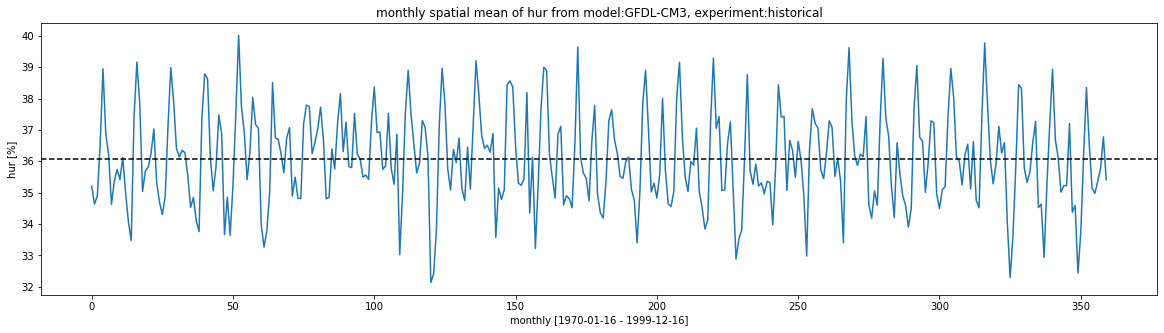

In [141]:
timeMean_options = [
    # 'annual',
    'monthly'
    ]

aWeights = np.cos(np.deg2rad(data.lat))
y = data.weighted(aWeights).mean(dim=('lat','lon')) 
y = resample_timeMean(y, timeMean_options[0])
title = '{} spatial mean of {} from model:{}, experiment:{}'.format(timeMean_options[0], data_options[0], datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format(data_options[0], '%')


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

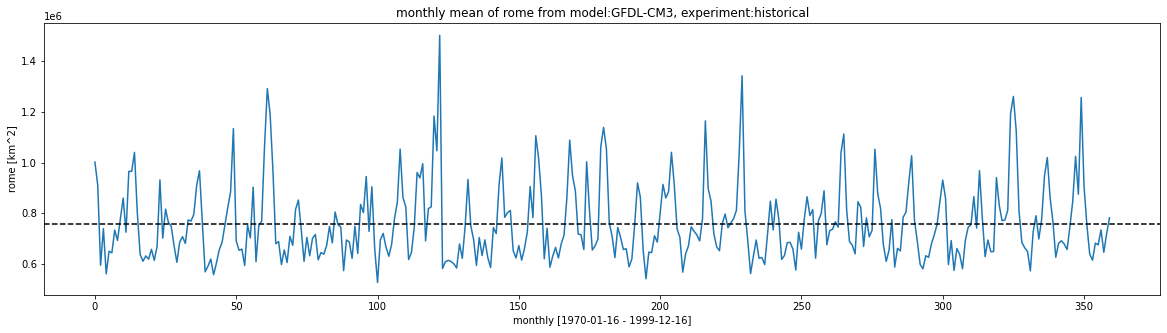

In [142]:
timeMean_options = [
    # 'annual',
    'monthly'
    ]

x = resample_timeMean(org, timeMean_options[0])
title = '{} mean of {} from model:{}, experiment:{}'.format(timeMean_options[0], org_options[0], datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format(org_options[0], org.units)


plot_timeseries(x, timeMean_option=timeMean_options[0],title=title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

### correlation in scenario

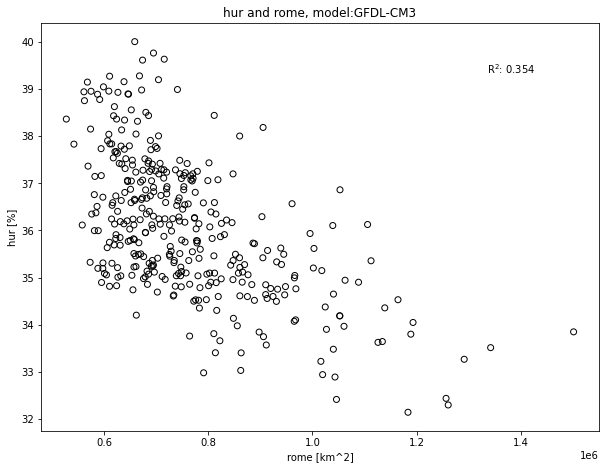

In [143]:
timeMean_options = [
    # 'annual',
    'monthly'
    ]

x = resample_timeMean(org, timeMean_options[0])
aWeights = np.cos(np.deg2rad(data.lat))
y = data.weighted(aWeights).mean(dim=('lat','lon')) 

fig = plt.figure()
ax= fig.add_subplot()
plot_scatter(x, y, ax)
plt.title('{} and {}, model:{}'.format(data_options[0], org_options[0], datasets[0]))
plt.xlabel('{} [{}]'.format(org_options[0], org.units))
plt.ylabel('{} [{}]'.format(data_options[0], '%'))
plt.show()

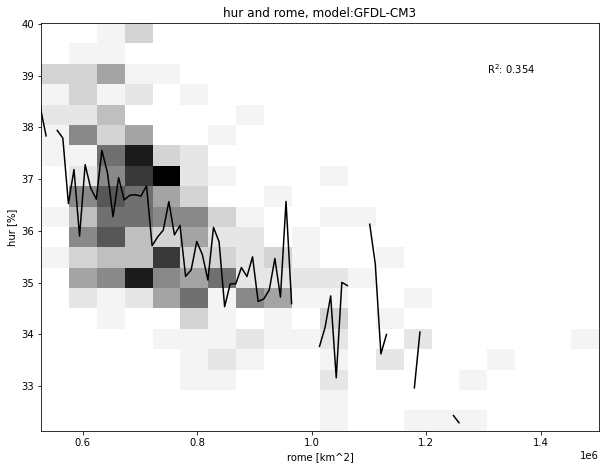

In [145]:
timeMean_options = [
    # 'annual',
    'monthly',
    ]

x = resample_timeMean(org, timeMean_options[0])
aWeights = np.cos(np.deg2rad(data.lat))
y = data.weighted(aWeights).mean(dim=('lat','lon')) 

fig = plt.figure()
ax= fig.add_subplot()

plt.hist2d(x,y,[20,20], cmap ='Greys') #, vmin=0, vmax=300)
plot_bins(x,y, ax)

plt.title('{} and {}, model:{}'.format(data_options[0], org_options[0], datasets[0]))
plt.xlabel('{} [{}]'.format(org_options[0], org.units))
plt.ylabel('{} [{}]'.format(data_options[0], '%'))
plt.show()

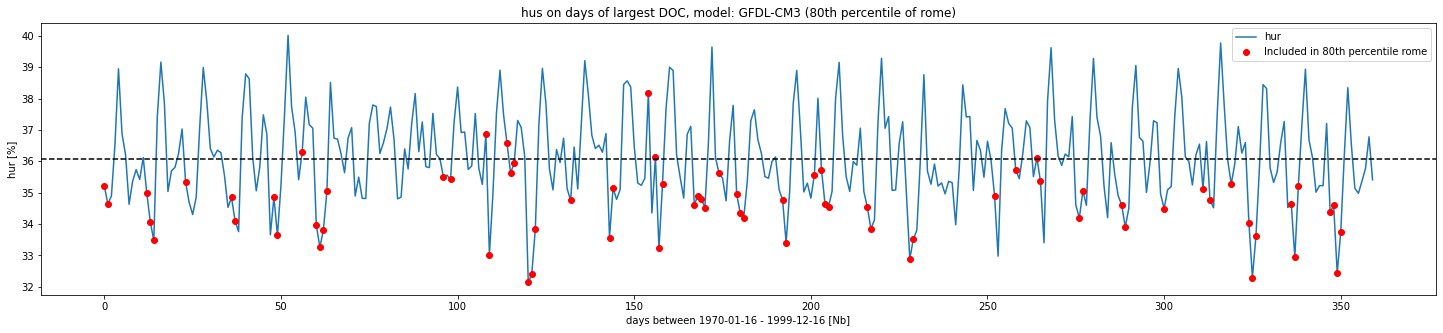

In [147]:
timeMean_options = [
    # 'annual',
    'monthly',
    ]

x = resample_timeMean(org, timeMean_options[0])
aWeights = np.cos(np.deg2rad(data.lat))
y = data.weighted(aWeights).mean(dim=('lat','lon')) 
y = resample_timeMean(y, timeMean_options[0])

x_threshold = 80
x_prctile = np.percentile(x, x_threshold)
x_org= np.squeeze(np.argwhere(x.data>=x_prctile)) # positive anomalies are where DOC exceed the monthly mean

x_data= np.arange(0,len(y))

f, ax = plt.subplots(figsize = (25,5))
title = 'hus on days of largest DOC, model: {} ({}th percentile of {})'.format(datasets[0], str(x_threshold), org_options[0])
label = 'Included in {}th percentile {}'.format(str(x_threshold), org_options[0])

ax.plot(x_data,y, zorder=0,label=data_options[0])
ax.scatter(x_org, y[x_org], label=label, color='r')
ax.axhline(y=np.mean(y), color='k', linestyle = '--')
ax.set_title(title)


ax.set_xlabel('days between ' + str(data.coords['time'][0].values)[:10] 
              +' - '+ str(data.coords['time'][-1].values)[:10] + ' [Nb]')
ax.set_ylabel('{} [{}]'.format(data_options[0], '%'))
ax.legend()

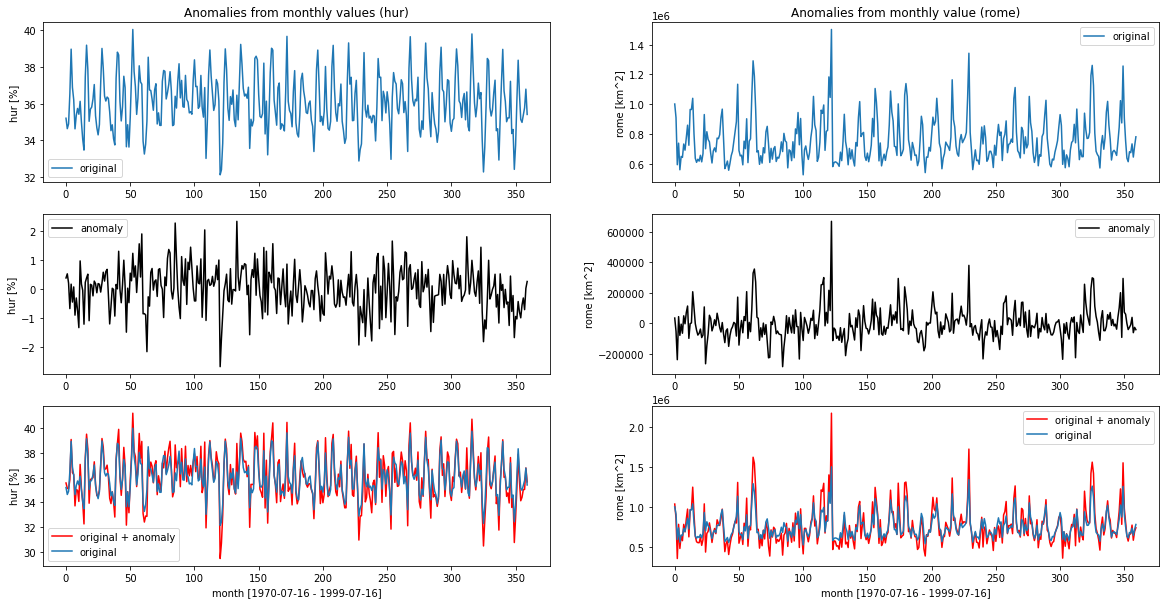

In [149]:
aWeights = np.cos(np.deg2rad(data.lat))
f = data.weighted(aWeights).mean(dim=('lat','lon')) 
climatology = f.groupby('time.month').mean('time')
data_anomalies_month = f.groupby('time.month') - climatology 

fig, axs = plt.subplots(3,2,figsize=(20,10))

xlabel = '{} [{} - {}]'.format('month', str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format(data_options[0], '%')

plt.sca(axs[0, 0])
plt.plot(f, label='original')
plt.ylabel(ylabel)
plt.title('Anomalies from monthly values ({})'.format(data_options[0]))
plt.legend()

plt.sca(axs[1,0])
plt.plot(data_anomalies_month, 'k', label='anomaly')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2,0])
plt.plot(f+data_anomalies_month,color='r', label='original + anomaly')
plt.plot(f, label='original')
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

f = resample_timeMean(org, timeMean_options[0])
climatology = f.groupby('time.month').mean('time')
org_anomalies_month = f.groupby('time.month') - climatology 

xlabel = '{} [{} - {}]'.format('month', str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format(org_options[0], org.units)

plt.sca(axs[0, 1])
plt.plot(f, label='original')
plt.ylabel(ylabel)
plt.title('Anomalies from monthly value ({})'.format(org_options[0]))
plt.legend()

plt.sca(axs[1,1])
plt.plot(org_anomalies_month, 'k', label='anomaly')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2,1])
plt.plot(f+org_anomalies_month,color='r', label='original + anomaly')
plt.plot(f, label='original')
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()
plt.show()

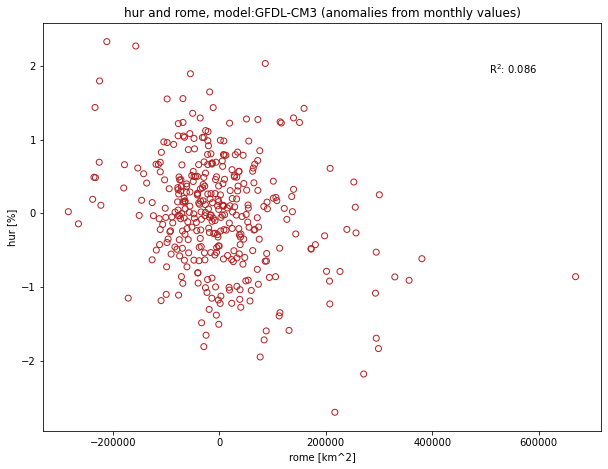

In [151]:
timeMean_options = [
    'monthly'
    ]

f = resample_timeMean(org, timeMean_options[0])
climatology = f.groupby('time.month').mean('time')
x = f.groupby('time.month') - climatology 

aWeights = np.cos(np.deg2rad(data.lat))
f = data.weighted(aWeights).mean(dim=('lat','lon')) 
f = resample_timeMean(f, timeMean_options[0])
climatology = f.groupby('time.month').mean('time')
y = f.groupby('time.month') - climatology 


fig = plt.figure()
ax= fig.add_subplot()
plot_scatter(x, y, ax, 'firebrick')
plt.title('{} and {}, model:{} (anomalies from monthly values)'.format(data_options[0], org_options[0], datasets[0]))
plt.xlabel('{} [{}]'.format(org_options[0], org.units))
plt.ylabel('{} [{}]'.format(data_options[0], '%'))
plt.show()

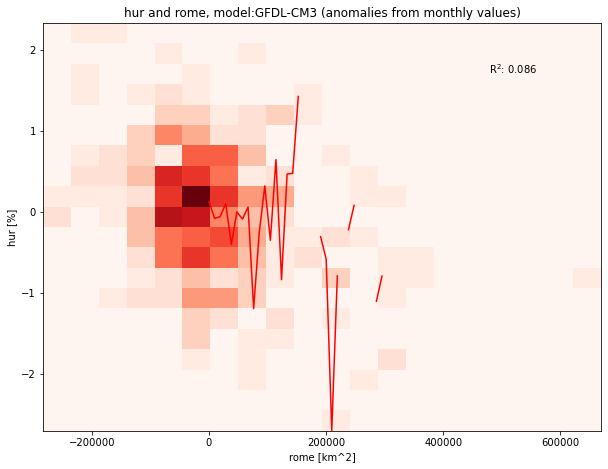

In [153]:
timeMean_options = [
    'monthly',
    ]

f = resample_timeMean(org, timeMean_options[0])
climatology = f.groupby('time.month').mean('time')
x = f.groupby('time.month') - climatology 

aWeights = np.cos(np.deg2rad(data.lat))
f = data.weighted(aWeights).mean(dim=('lat','lon')) 
f = resample_timeMean(f, timeMean_options[0])
climatology = f.groupby('time.month').mean('time')
y = f.groupby('time.month') - climatology 


fig = plt.figure()
ax= fig.add_subplot()

plt.hist2d(x,y,[20,20], cmap = 'Reds') #, vmin=0, vmax=300)
plot_bins(x,y, ax, 'r')

plt.title('{} and {}, model:{} (anomalies from monthly values)'.format(data_options[0], org_options[0], datasets[0]))
plt.xlabel('{} [{}]'.format(org_options[0], org.units))
plt.ylabel('{} [{}]'.format(data_options[0], '%'))
plt.show()

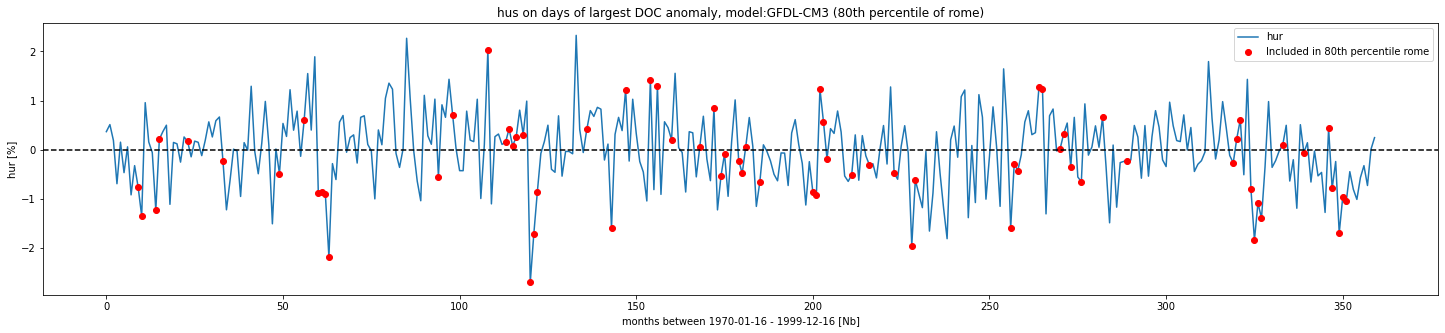

In [155]:
timeMean_options = [
    'monthly',
    ]

f = resample_timeMean(org, timeMean_options[0])
climatology = f.groupby('time.month').mean('time')
x = f.groupby('time.month') - climatology 

aWeights = np.cos(np.deg2rad(data.lat))
f = data.weighted(aWeights).mean(dim=('lat','lon')) 
f = resample_timeMean(f, timeMean_options[0])
climatology = f.groupby('time.month').mean('time')
y = f.groupby('time.month') - climatology 


x_threshold = 80
x_prctile = np.percentile(x, x_threshold)
x_org= np.squeeze(np.argwhere(x.data>=x_prctile)) # positive anomalies are where DOC exceed the monthly mean

x_data= np.arange(0,len(y))

f, ax = plt.subplots(figsize = (25,5))
title = 'hus on days of largest DOC anomaly, model:{} ({}th percentile of {})'.format(datasets[0], str(x_threshold), org_options[0])
label = 'Included in {}th percentile {}'.format(str(x_threshold), org_options[0])

ax.plot(x_data,y, zorder=0,label=data_options[0])
ax.scatter(x_org, y[x_org], label=label, color='r')
ax.axhline(y=np.mean(y), color='k', linestyle = '--')
ax.set_title(title)


ax.set_xlabel('months between ' + str(data.coords['time'][0].values)[:10] 
              +' - '+ str(data.coords['time'][-1].values)[:10] + ' [Nb]')
ax.set_ylabel('{} [{}]'.format(data_options[0], '%'))
ax.legend()

### comparing datasets

In [49]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    'bcc-csm1-1',   # 4 no wao rcp
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data, no hus rcp data
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    # 'inmcm4',       # 13 no wap data
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data, no hus data
    ]

observations = [
    ]

datasets = models + observations

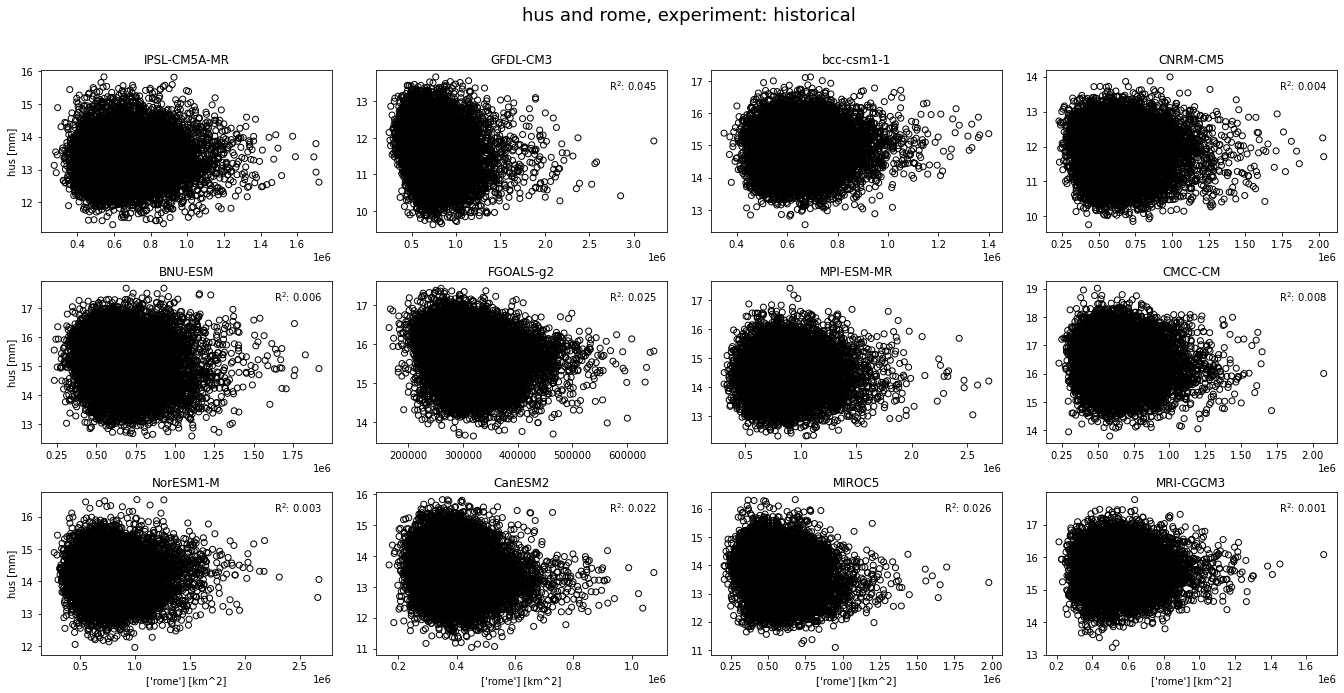

In [50]:
timeMean_options = [
    # 'annual',
    # 'monthly',
    'daily'
    ]

quantile_low = 0
quantile_high = 1

absolute_xlimits = False
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:

        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
        x = resample_timeMean(org, timeMean_options[0])

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))

    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:

        ds = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])
        data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
        g = 9.8
        data = xr.DataArray(
            data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
            dims=['time', 'lat', 'lon'],
            coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
            attrs={'units':'mm'}
            )
        
        if hus_d:
            wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
            data = data.where(wap500>0, np.nan)

        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('lat','lon')) 
        y = resample_timeMean(y, timeMean_options[0])

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))

    ymin = np.min(ymin)
    ymax = np.max(ymax)
else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} and {}, experiment: {}'.format(data_options[0], org_options[0], experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    x = resample_timeMean(org, timeMean_options[0])


    ds = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])
    data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
    g = 9.8
    data = xr.DataArray(
        data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
        dims=['time', 'lat', 'lon'],
        coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
        attrs={'units':'mm'}
        )
    
    if hus_d:
        wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
        data = data.where(wap500>0, np.nan)

    aWeights = np.cos(np.deg2rad(data.lat))
    y = data.weighted(aWeights).mean(dim=('lat','lon')) 
    y = resample_timeMean(y, timeMean_options[0])

    plot_scatter(x, y , ax)
    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{}]'.format(org_options, org.units)
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = '{} [{}]'.format(data_options[0], data.units)
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

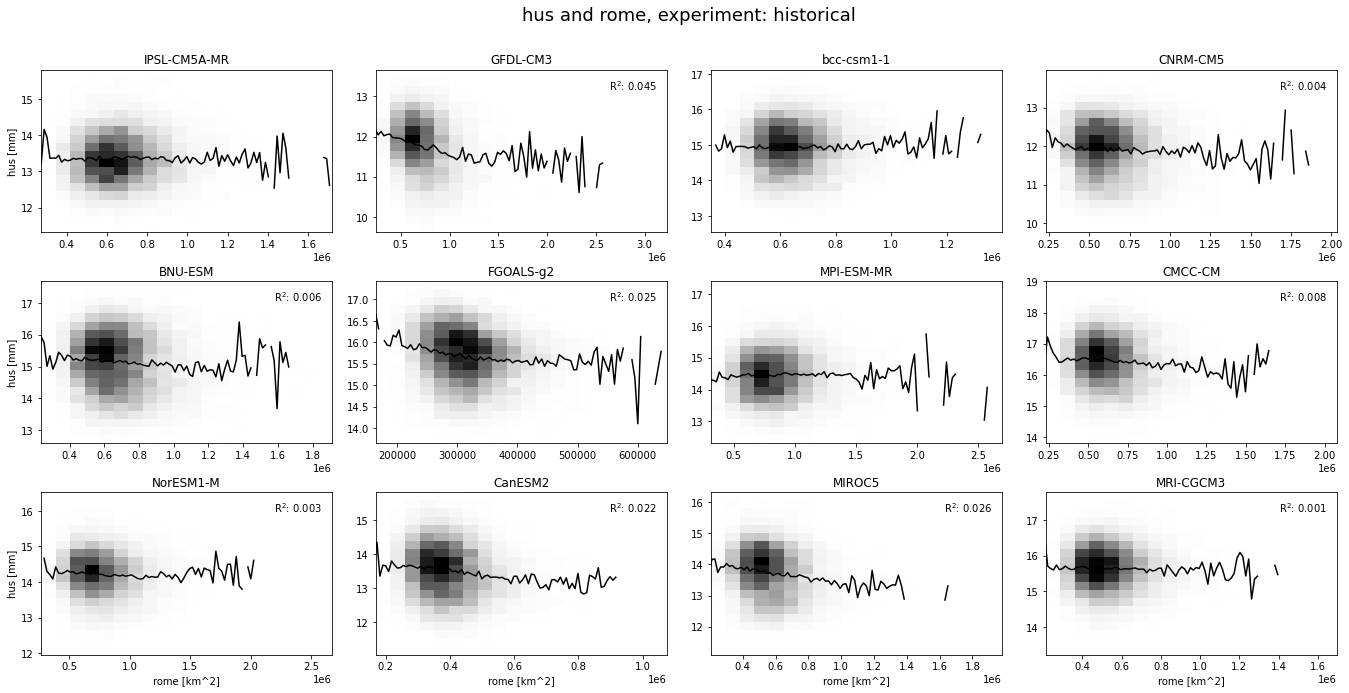

In [51]:
timeMean_options = [
    # 'annual',
    # 'monthly',
    'daily'
    ]

quantile_low = 0
quantile_high = 1

absolute_xlimits = False
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:

        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
        x = resample_timeMean(org, timeMean_options[0])

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))

    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:

        ds = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])
        data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
        g = 9.8
        data = xr.DataArray(
            data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
            dims=['time', 'lat', 'lon'],
            coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
            attrs={'units':'mm'}
            )
        
        if hus_d:
            wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
            data = data.where(wap500>0, np.nan)

        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('lat','lon')) 
        y = resample_timeMean(y, timeMean_options[0])

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))

    ymin = np.min(ymin)
    ymax = np.max(ymax)
else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} and {}, experiment: {}'.format(data_options[0], org_options[0], experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    x = resample_timeMean(org, timeMean_options[0])


    ds = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])
    data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
    g = 9.8
    data = xr.DataArray(
        data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
        dims=['time', 'lat', 'lon'],
        coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
        attrs={'units':'mm'}
        )
    
    if hus_d:
        wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
        data = data.where(wap500>0, np.nan)

    aWeights = np.cos(np.deg2rad(data.lat))
    y = data.weighted(aWeights).mean(dim=('lat','lon')) 
    y = resample_timeMean(y, timeMean_options[0])

    plt.hist2d(x,y,[20,20], cmap ='Greys') #, vmin=0, vmax=300)
    plot_bins(x,y, ax)


    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{}]'.format(org_options[0], org.units)
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = '{} [{}]'.format(data_options[0], data.units)
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

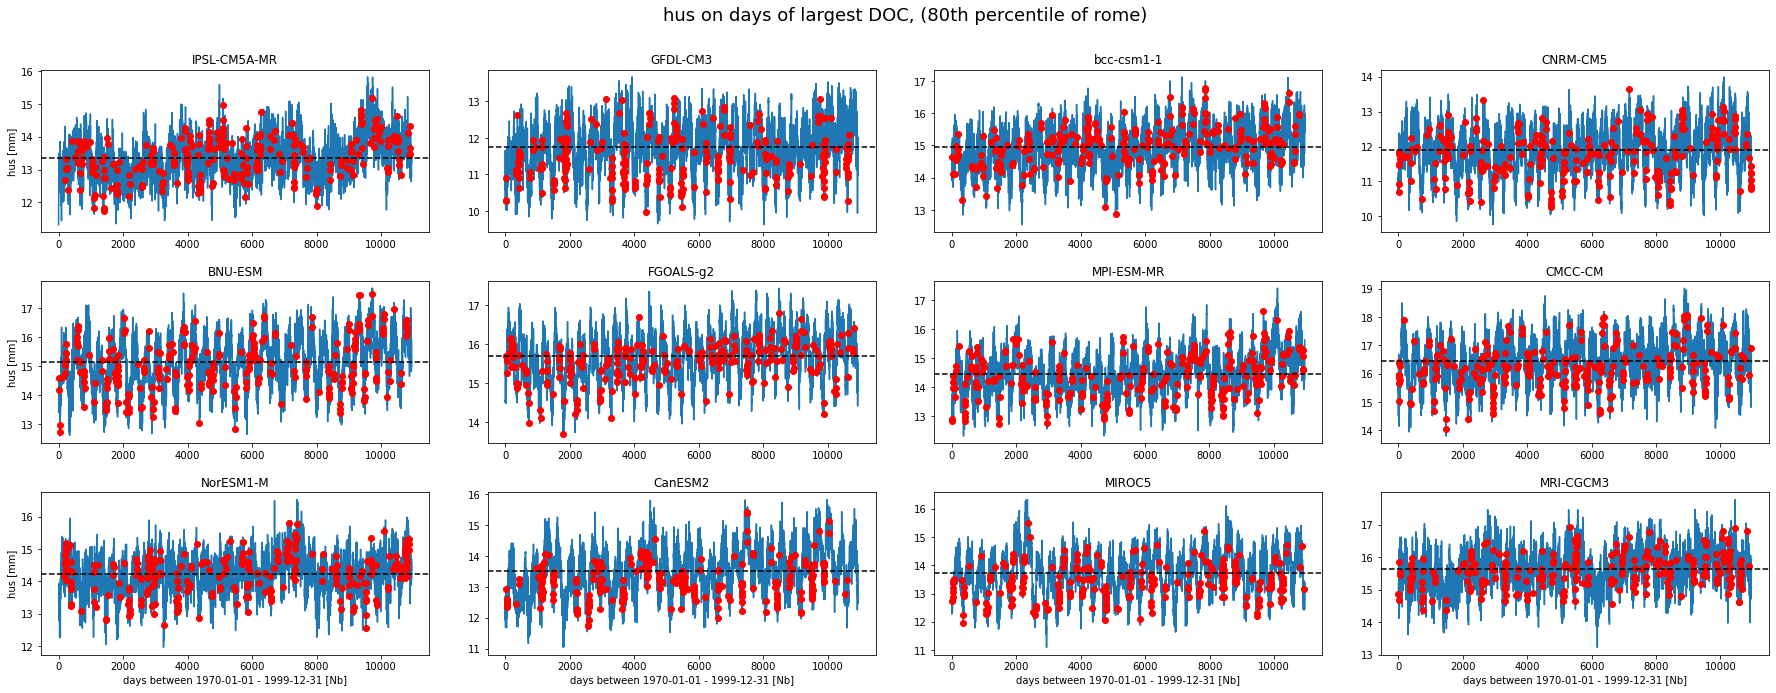

In [52]:
timeMean_options = [
    # 'annual',
    # 'monthly',
    'daily'
    ]

quantile_low = 0
quantile_high = 1

absolute_xlimits = False
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:

        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
        x = resample_timeMean(org, timeMean_options[0])

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))

    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:

        ds = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])
        data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
        g = 9.8
        data = xr.DataArray(
            data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
            dims=['time', 'lat', 'lon'],
            coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
            attrs={'units':'mm'}
            )
        
        if hus_d:
            wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
            data = data.where(wap500>0, np.nan)

        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('lat','lon')) 
        y = resample_timeMean(y, timeMean_options[0])

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))

    ymin = np.min(ymin)
    ymax = np.max(ymax)
else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(30,17.5))
title = 'hus on days of largest DOC, ({}th percentile of {})'.format(str(x_threshold), org_options[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    x = resample_timeMean(org, timeMean_options[0])


    ds = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])
    data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
    g = 9.8
    data = xr.DataArray(
        data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
        dims=['time', 'lat', 'lon'],
        coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
        attrs={'units':'mm'}
        )
    
    if hus_d:
        wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
        data = data.where(wap500>0, np.nan)

    aWeights = np.cos(np.deg2rad(data.lat))
    y = data.weighted(aWeights).mean(dim=('lat','lon')) 
    y = resample_timeMean(y, timeMean_options[0])

    x_threshold = 97.5
    x_prctile = np.percentile(x, x_threshold)
    x_org= np.squeeze(np.argwhere(x.data>=x_prctile)) # positive anomalies are where DOC exceed the monthly mean

    x_data= np.arange(0,len(y))

    ax.plot(x_data,y, zorder=0,label=data_options[0])
    ax.scatter(x_org, y[x_org], label=label, color='r')
    ax.axhline(y=np.mean(y), color='k', linestyle = '--')

    label = 'Included in {}th percentile {}'.format(str(x_threshold), org_options[0])

    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = 'days between ' + str(data.coords['time'][0].values)[:10] +' - '+ str(data.coords['time'][-1].values)[:10] + ' [Nb]'
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = '{} [{}]'.format(data_options[0], data.units)
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

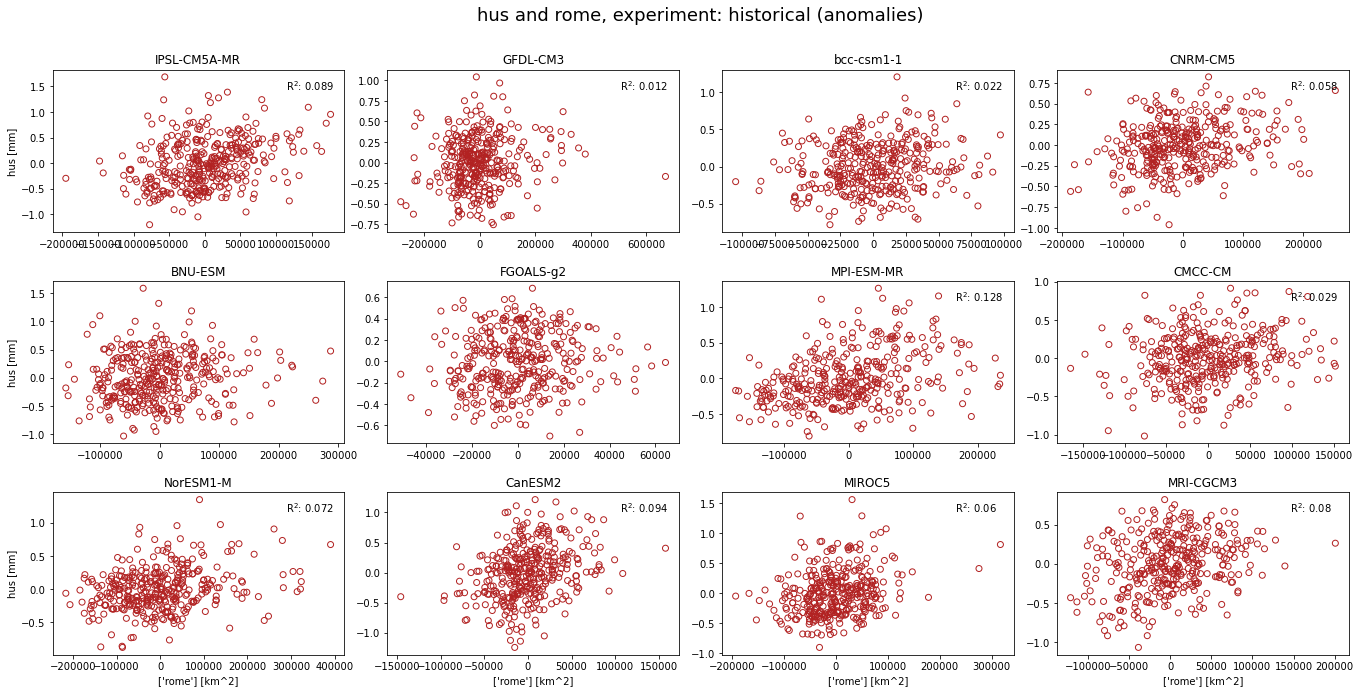

In [53]:
timeMean_options = [
    'monthly',
    ]

quantile_low = 0
quantile_high = 1

absolute_xlimits = False
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:

        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
        f = resample_timeMean(org, timeMean_options[0])
        climatology = f.groupby('time.month').mean('time')
        x = f.groupby('time.month') - climatology 

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))

    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:

        ds = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])
        data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
        g = 9.8
        data = xr.DataArray(
            data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
            dims=['time', 'lat', 'lon'],
            coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
            attrs={'units':'mm'}
            )
        
        if hus_d:
            wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
            data = data.where(wap500>0, np.nan)

        aWeights = np.cos(np.deg2rad(data.lat))
        f = data.weighted(aWeights).mean(dim=('lat','lon')) 
        f = resample_timeMean(f, timeMean_options[0])
        climatology = f.groupby('time.month').mean('time')
        y = f.groupby('time.month') - climatology 

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))

    ymin = np.min(ymin)
    ymax = np.max(ymax)
else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} and {}, experiment: {} (anomalies)'.format(data_options[0], org_options[0], experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    f = resample_timeMean(org, timeMean_options[0])
    climatology = f.groupby('time.month').mean('time')
    x = f.groupby('time.month') - climatology 

    ds = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])
    data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
    g = 9.8
    data = xr.DataArray(
        data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
        dims=['time', 'lat', 'lon'],
        coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
        attrs={'units':'mm'}
        )
    
    if hus_d:
        wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
        data = data.where(wap500>0, np.nan)

    aWeights = np.cos(np.deg2rad(data.lat))
    f = data.weighted(aWeights).mean(dim=('lat','lon')) 
    f = resample_timeMean(f, timeMean_options[0])
    climatology = f.groupby('time.month').mean('time')
    y = f.groupby('time.month') - climatology 

    plot_scatter(x, y , ax, 'firebrick')
    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{}]'.format(org_options, org.units)
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = '{} [{}]'.format(data_options[0], data.units)
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

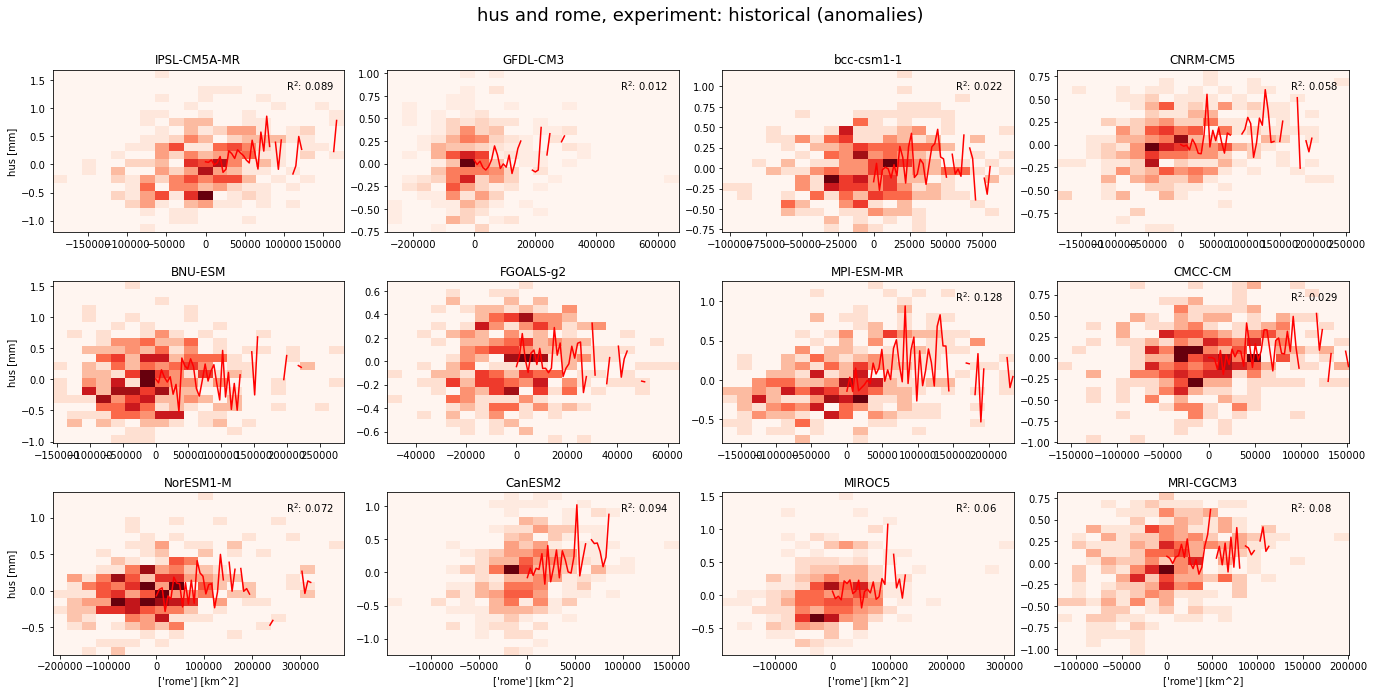

In [54]:
timeMean_options = [
    'monthly',
    ]

quantile_low = 0
quantile_high = 1

absolute_xlimits = False
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:

        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
        f = resample_timeMean(org, timeMean_options[0])
        climatology = f.groupby('time.month').mean('time')
        x = f.groupby('time.month') - climatology 

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))

    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:

        ds = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])
        data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
        g = 9.8
        data = xr.DataArray(
            data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
            dims=['time', 'lat', 'lon'],
            coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
            attrs={'units':'mm'}
            )
        
        if hus_d:
            wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
            data = data.where(wap500>0, np.nan)

        aWeights = np.cos(np.deg2rad(data.lat))
        f = data.weighted(aWeights).mean(dim=('lat','lon')) 
        f = resample_timeMean(f, timeMean_options[0])
        climatology = f.groupby('time.month').mean('time')
        y = f.groupby('time.month') - climatology 

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))

    ymin = np.min(ymin)
    ymax = np.max(ymax)
else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} and {}, experiment: {} (anomalies)'.format(data_options[0], org_options[0], experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    f = resample_timeMean(org, timeMean_options[0])
    climatology = f.groupby('time.month').mean('time')
    x = f.groupby('time.month') - climatology 

    ds = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])
    data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
    g = 9.8
    data = xr.DataArray(
        data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
        dims=['time', 'lat', 'lon'],
        coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
        attrs={'units':'mm'}
        )
    
    if hus_d:
        wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
        data = data.where(wap500>0, np.nan)

    aWeights = np.cos(np.deg2rad(data.lat))
    f = data.weighted(aWeights).mean(dim=('lat','lon')) 
    f = resample_timeMean(f, timeMean_options[0])
    climatology = f.groupby('time.month').mean('time')
    y = f.groupby('time.month') - climatology 

    plt.hist2d(x,y,[20,20], cmap = 'Reds') #, vmin=0, vmax=300)
    plot_bins(x,y, ax, 'r')
    
    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{}]'.format(org_options, org.units)
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = '{} [{}]'.format(data_options[0], data.units)
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

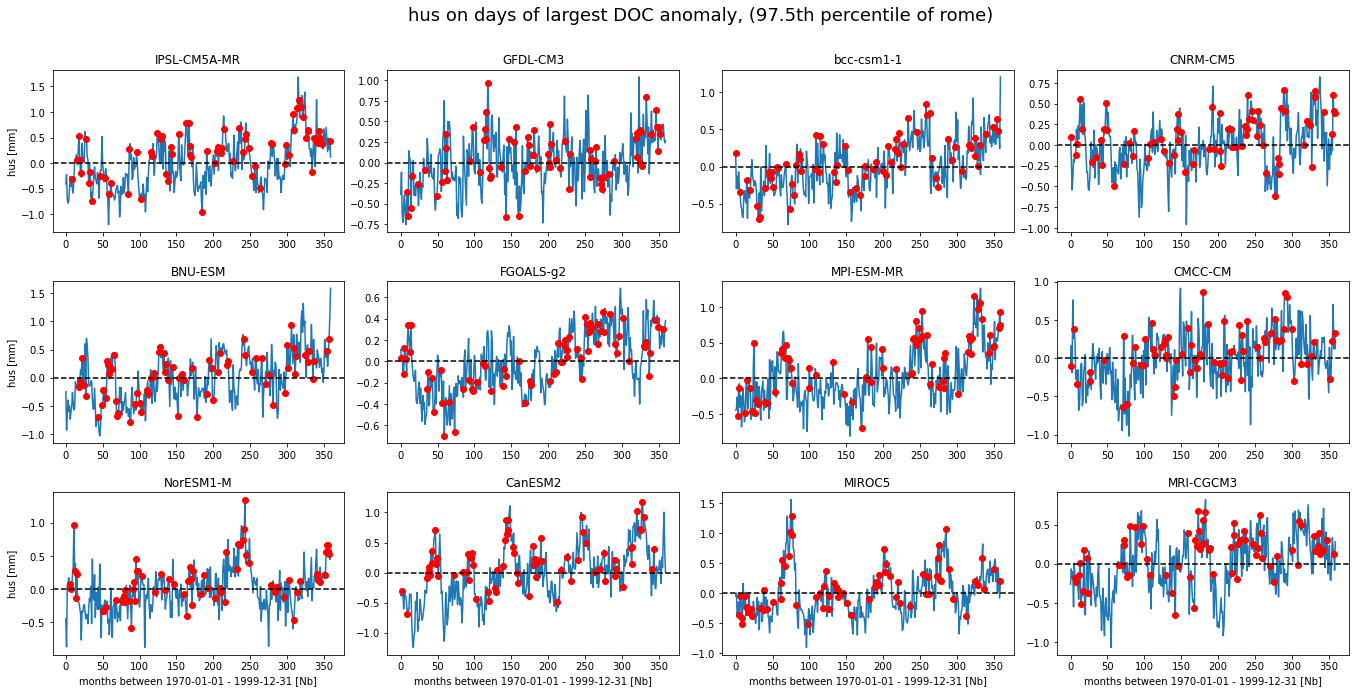

In [55]:
timeMean_options = [
    'monthly',
    ]

quantile_low = 0
quantile_high = 1

absolute_xlimits = False
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:

        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
        f = resample_timeMean(org, timeMean_options[0])
        climatology = f.groupby('time.month').mean('time')
        x = f.groupby('time.month') - climatology 

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))

    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:

        ds = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])
        data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
        g = 9.8
        data = xr.DataArray(
            data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
            dims=['time', 'lat', 'lon'],
            coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
            attrs={'units':'mm'}
            )
        
        if hus_d:
            wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
            data = data.where(wap500>0, np.nan)

        aWeights = np.cos(np.deg2rad(data.lat))
        f = data.weighted(aWeights).mean(dim=('lat','lon')) 
        f = resample_timeMean(f, timeMean_options[0])
        climatology = f.groupby('time.month').mean('time')
        y = f.groupby('time.month') - climatology 

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))

    ymin = np.min(ymin)
    ymax = np.max(ymax)
else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'hus on days of largest DOC anomaly, ({}th percentile of {})'.format(str(x_threshold), org_options[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    f = resample_timeMean(org, timeMean_options[0])
    climatology = f.groupby('time.month').mean('time')
    x = f.groupby('time.month') - climatology 

    ds = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])
    data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
    g = 9.8
    data = xr.DataArray(
        data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
        dims=['time', 'lat', 'lon'],
        coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
        attrs={'units':'mm'}
        )
    
    if hus_d:
        wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
        data = data.where(wap500>0, np.nan)

    aWeights = np.cos(np.deg2rad(data.lat))
    f = data.weighted(aWeights).mean(dim=('lat','lon')) 
    f = resample_timeMean(f, timeMean_options[0])
    climatology = f.groupby('time.month').mean('time')
    y = f.groupby('time.month') - climatology 

    x_threshold = 80
    x_prctile = np.percentile(x, x_threshold)
    x_org= np.squeeze(np.argwhere(x.data>=x_prctile)) # positive anomalies are where DOC exceed the monthly mean

    x_data= np.arange(0,len(y))

    label = 'Included in {}th percentile {}'.format(str(x_threshold), org_options[0])

    ax.plot(x_data,y, zorder=0,label=data_options[0])
    ax.scatter(x_org, y[x_org], label=label, color='r')
    ax.axhline(y=np.mean(y), color='k', linestyle = '--')

    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = 'months between ' + str(data.coords['time'][0].values)[:10] +' - '+ str(data.coords['time'][-1].values)[:10] + ' [Nb]'
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = '{} [{}]'.format(data_options[0], data.units)
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

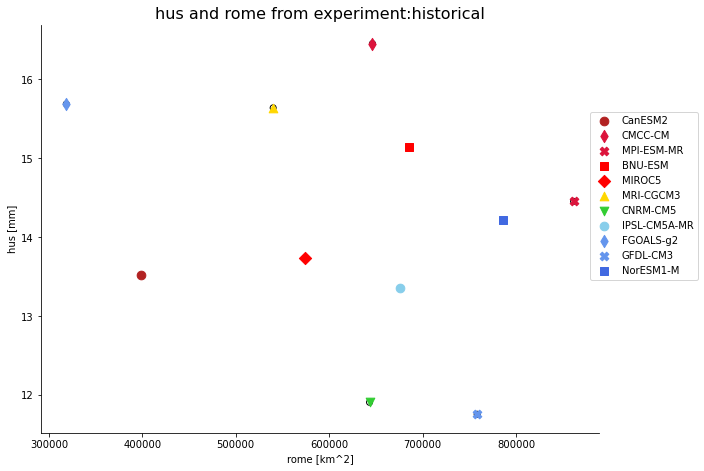

In [61]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    'bcc-csm1-1',   # 4 no wao rcp
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data, no hus rcp data
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    # 'inmcm4',       # 13 no wap data
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data, no hus data
    ]

colors = [
    'firebrick','crimson', 'crimson','red', 'red', # red
    'gold', # yellow
    'limegreen', # green
    'skyblue', 'cornflowerblue', 'cornflowerblue', 'royalblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']

order_by_tas = True
if order_by_tas:
    order_list = []
    for dataset in datasets:
        if dataset == 'GPCP':
            order_list = np.append(order_list, 0)
        else:
            data = get_metric('tas_tMean', dataset, experiment=experiments[0])['tas_tMean']
            aWeights = np.cos(np.deg2rad(data.lat))
            tas = data.weighted(aWeights).mean(dim=('lat','lon'))
            order_list = np.append(order_list, tas)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()


x= []
y= []
for dataset in datasets:

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    x_data = org.mean(dim=('time'))
    x = np.append(x, x_data)

    ds = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])
    data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
    g = 9.8
    data = xr.DataArray(
        data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
        dims=['time', 'lat', 'lon'],
        coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
        attrs={'units':'mm'}
        )
    
    if hus_d:
        wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
        data = data.where(wap500>0, np.nan)

    aWeights = np.cos(np.deg2rad(data.lat))
    y_data = data.weighted(aWeights).mean(dim=('lat','lon')) .mean(dim='time')
    y = np.append(y, y_data)

fig, ax = plt.subplots()
title = '{} and {} from experiment:{}'.format(data_options[0], org_options[0], experiments[0])
xlabel = '{} [{}]'.format(org_options[0], org.units)
ylabel = '{} [{}]'.format(data_options[0], data.units)

plot_scatter(x,y,ax)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    plt.legend(bbox_to_anchor=(0.975,0.8))

sns.despine(top=True, right=True, left=False)
plt.title(title, fontsize = 16)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

### from warming

In [57]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    # 'bcc-csm1-1',   # 4 no wao rcp
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data, no hus rcp data
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    # 'inmcm4',       # 13 no wap data
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data, no hus data
    ]

observations = [
    ]

datasets = models + observations

In [62]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    # 'bcc-csm1-1',   # 4 no wao rcp
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data, no hus rcp data
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    # 'inmcm4',       # 13 no wap data
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data, no hus data
    ]

colors = [
    'firebrick','crimson', 'crimson','red', 'red', # red
    'gold', # yellow
    'limegreen', # green
    'skyblue', 'cornflowerblue', 'cornflowerblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']

order_by_tasdiff = True
if order_by_tasdiff:
    order_list = []
    for dataset in datasets:

        if dataset == 'GPCP':
            order_list = np.append(order_list, 0)
        else:
            tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean']
            aWeights = np.cos(np.deg2rad(tas_historical.lat))

            tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
            tas_rcp = get_metric('tas_tMean', dataset, experiment='rcp85')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
            tasdiff = tas_rcp - tas_historical
            order_list = np.append(order_list, tasdiff)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()


x= []
y= []
for dataset in datasets:

    # print(dataset)
    org = get_metric(org_options[0], dataset, experiment = 'historical', resolution=resolutions[0])[org_options[0]]
    x_historical = org.mean(dim=('time'))
    org = get_metric(org_options[0], dataset, experiment = 'rcp85', resolution=resolutions[0])[org_options[0]]
    x_rcp = org.mean(dim=('time'))
    x_data = x_rcp - x_historical

    tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
    tas_rcp = get_metric('tas_tMean', dataset, experiment='rcp85')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
    tasdiff = tas_rcp - tas_historical
    x_data = x_data/tasdiff
    x = np.append(x, x_data)

    ds = get_dsvariable(variable, dataset, experiment = 'historical', resolution=resolutions[0])
    data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
    g = 9.8
    data = xr.DataArray(
        data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
        dims=['time', 'lat', 'lon'],
        coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
        attrs={'units':'mm'}
        )
    if hus_d:
        wap500 = get_dsvariable('wap', dataset, experiment = 'historical', resolution=resolutions[0])['wap'].sel(plev = 5e4)
        data = data.where(wap500>0, np.nan)

    aWeights = np.cos(np.deg2rad(data.lat))
    y_historical = data.weighted(aWeights).mean(dim=('lat','lon')) .mean(dim='time')

    ds = get_dsvariable(variable, dataset, experiment = 'rcp85', resolution=resolutions[0])
    data = ds[data_options[0]].sel(plev=slice(850e2,0)).fillna(0)
    g = 9.8
    data = xr.DataArray(
        data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
        dims=['time', 'lat', 'lon'],
        coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
        attrs={'units':'mm'}
        )
    if hus_d:
        wap500 = get_dsvariable('wap', dataset, experiment = 'rcp85', resolution=resolutions[0])['wap'].sel(plev = 5e4)
        data = data.where(wap500>0, np.nan)

    aWeights = np.cos(np.deg2rad(data.lat))
    y_rcp = data.weighted(aWeights).mean(dim=('lat','lon')) .mean(dim='time')

    y_data = y_rcp - y_historical
    y_data = y_data/tasdiff
    
    y = np.append(y, y_data)

fig, ax = plt.subplots()
title = 'Difference in {} and {}'.format(data_options[0], org_options[0])
xlabel = '{} [{}]'.format(org_options[0], org.units + ' K' + chr(0x207B) + chr(0x00B9))
ylabel = '{} [{}]'.format(data_options[0], data.units + ' K' + chr(0x207B) + chr(0x00B9))

plot_scatter(x,y,ax)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    plt.legend(bbox_to_anchor=(0.975,0.8))

sns.despine(top=True, right=True, left=False)
plt.axvline(0, color= 'k',  linestyle="--")
plt.title(title, fontsize = 16)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()